In [1]:
import numpy as np
import keras
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam
import keras.losses
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GroupNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from scikeras.wrappers import KerasClassifier
from keras.callbacks import ReduceLROnPlateau
import cv2
from cv2 import IMREAD_GRAYSCALE

In [2]:
labels = ['mild_dr', 'moderate_dr', 'no_dr', 'prolif_dr', 'severe_dr']
img_size = 128

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) 
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('C:/Users/ASUS/Downloads/diabetic/train')
test = get_training_data('C:/Users/ASUS/Downloads/diabetic/test')
val = get_training_data('C:/Users/ASUS/Downloads/diabetic/val')

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\856015802.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [5]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=5)
y_test=to_categorical(y_test,num_classes=5)
y_val=to_categorical(y_val,num_classes=5)

In [6]:
len(x_train)

9779

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 45, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True, 
        vertical_flip=True) 

datagen.fit(x_train)

In [9]:
len(x_train)

9779

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [11]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu' , input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'valid' , activation = 'tanh'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'valid' , activation = 'tanh'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'valid' , activation = 'tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'valid' , activation = 'tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 5 , activation = 'softmax'))

model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [18]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 100) ,epochs = 30, validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/30
98/98 [==============================] - 353s 4s/step - loss: 1.3412 - accuracy: 0.4295 - val_loss: 1.5266 - val_accuracy: 0.3300 - lr: 3.0000e-04
Epoch 2/30
98/98 [==============================] - 339s 3s/step - loss: 1.3415 - accuracy: 0.4295 - val_loss: 1.5442 - val_accuracy: 0.3099 - lr: 3.0000e-04
Epoch 3/30
98/98 [==============================] - 366s 4s/step - loss: 1.3406 - accuracy: 0.4295 - val_loss: 1.5253 - val_accuracy: 0.3321 - lr: 3.0000e-04
Epoch 4/30
98/98 [==============================] - 307s 3s/step - loss: 1.3410 - accuracy: 0.4294 - val_loss: 1.5610 - val_accuracy: 0.3228 - lr: 3.0000e-04
Epoch 5/30
98/98 [==============================] - 344s 4s/step - loss: 1.3378 - accuracy: 0.4299 - val_loss: 1.5636 - val_accuracy: 0.3350 - lr: 3.0000e-04
Epoch 6/30
98/98 [==============================] - 344s 4s/step - loss: 1.3382 - accuracy: 0.4293 - val_loss: 1.5405 - val_accuracy: 0.3550 - lr: 3.0000e-04
Epoch 7/30
98/98 [==============================] - 

In [19]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

44/44 [==============================] - 8s 176ms/step - loss: 1.4843 - accuracy: 0.4281
Loss of the model is -  1.4842848777770996
44/44 [==============================] - 8s 176ms/step - loss: 1.4843 - accuracy: 0.4281
Accuracy of the model is -  42.80601143836975 %


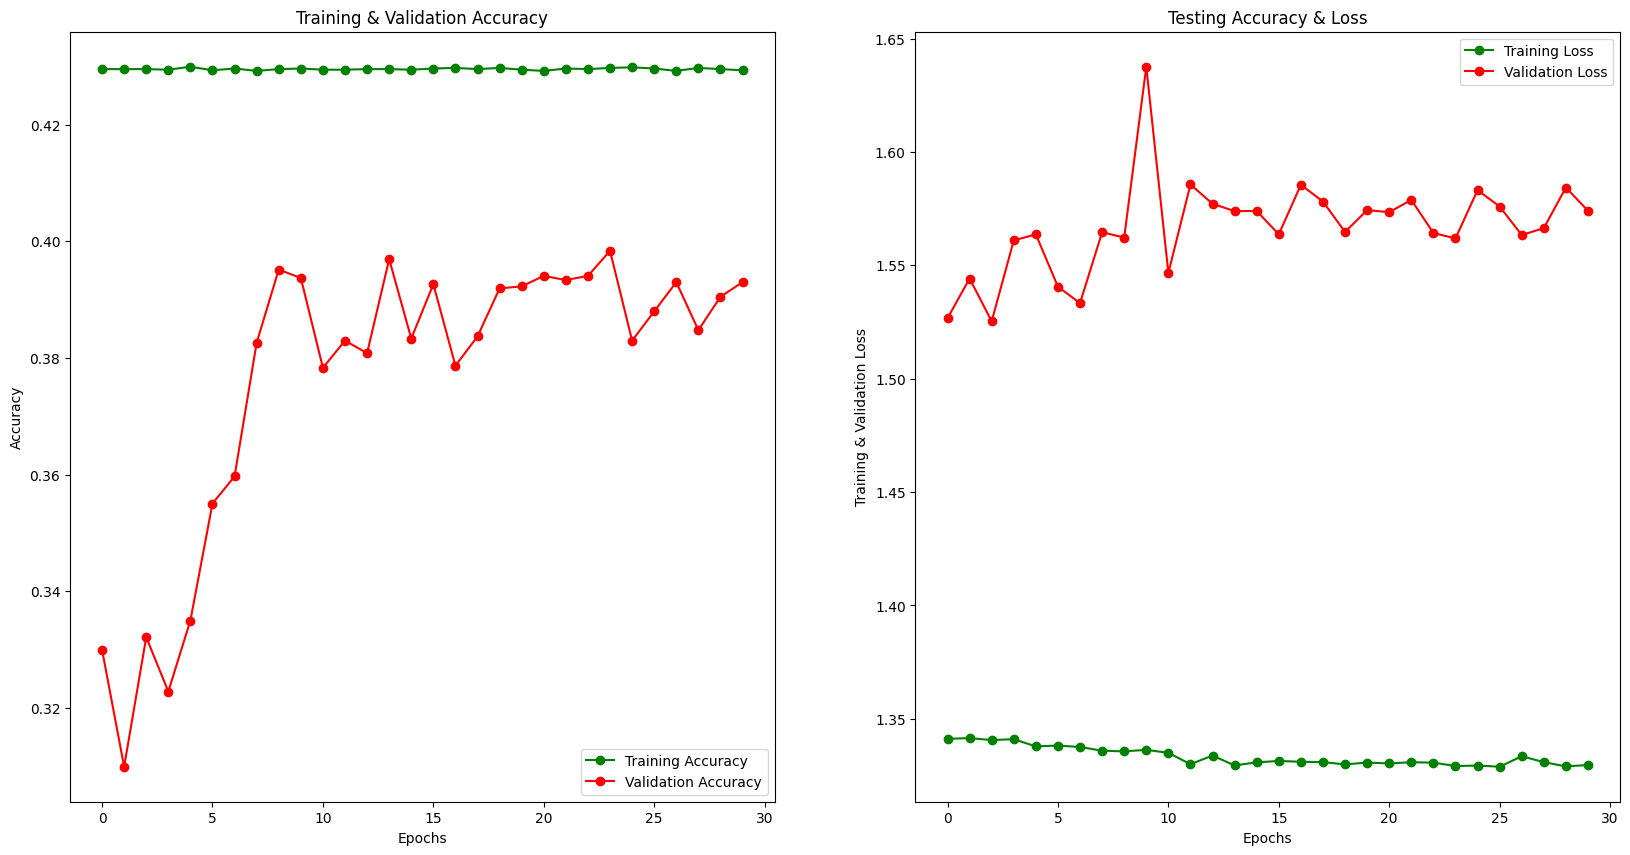

In [22]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [23]:
predicted_classes = model.predict(x_test)
predicted_classes = np.round(predicted_classes)  

44/44 [==============================] - 8s 170ms/step


In [24]:
print(classification_report(y_test, predicted_classes, target_names = ['mild_dr (Class 0)','moderate_dr (Class 1)',
                                                                      'no_dr (Class 2)', 'proliferative_dr(Calss 3)', 'severe_dr (Class 4)']))

                           precision    recall  f1-score   support

        mild_dr (Class 0)       0.24      0.05      0.08       240
    moderate_dr (Class 1)       0.17      0.00      0.00       400
          no_dr (Class 2)       0.51      0.59      0.55       600
proliferative_dr(Calss 3)       0.00      0.00      0.00        70
      severe_dr (Class 4)       0.12      0.02      0.04        87

                micro avg       0.49      0.27      0.34      1397
                macro avg       0.21      0.13      0.13      1397
             weighted avg       0.32      0.27      0.25      1397
              samples avg       0.27      0.27      0.27      1397



C:\Users\ASUS\condenada\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\condenada\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
